# Gravitational Waves

*Chirping from afar,  
Melody of two black holes--  
Faint gravity waves*

Gabriele Bozzola, 2021

At the end of this notebook, you will be able to appreciate the various references in this haiku (see bonus problem).

Gravitational waves are spacetime perturbations described by Einstein's theory of general relativity. When a gravitational wave travels thorugh some space, it changes the way distances and times are measured: clocks tick at a different rate and rulers are stretched or contracted. In this notebook, we are not going to derive or discuss the details of the theory behind them. Instead, we are going to explore some astrophysical applications and get a glimpse of gravitational-wave astronomy. The goal of the notebook is to develop some working experience with gravitational waves.

### Learning Outcomes
#### Astrophysics of gravitational waves
Learn that:
- Gravitational waves carry away orbital energy from systems
- Systems for which gravitational waves are important
- Orbital evolution of systems in the gravitational-wave driven regime and time to merger
- Limits of the quadrupole approximation

#### Gravitational-wave signals
Learn that:
- Gravitational waves are extremely weak
- Gravitational waves are the most energetic events in the universe
- Gravitational-wave detection
- Basics of LIGO/Virgo interferometers
- Learn the scale of intensity in gravitational waves (as opposed to electromagnetic waves)

#### Python
Learn about:
- Reading in data in Python
- Docstrings
- Perform simple integral with np.cumsum

#### Review
- The two-body problem

In [4]:
# First, we set up our Python environment

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (9,6)

# Some physical constants are defined here for your convenience (units are always cgs)
# These constants may or may not be useful
G = 6.674e-8 # cgs
c = 2.998e10 # cm/s
Msun = 1.988e33 # g
Rsun = 6.957e10 # cm
pc = 3.085e18 # cm
AU = 1.4953e13 # cm
km = 10**5 # cm

## Emission of energy via gravitational waves


In the same way electromagnetic waves are produced by moving charges, gravitational waves are emitted by moving masses. The prime example of this is binary systems. When two objects orbit, they lose energy due to emission of gravitational waves, energy that comes from the orbit of the system. One of the effects of gravitational waves is that they also radiate away angular momentum, which tends to circularize the orbit. To keep the discussion simple, we are going to **focus on circular orbits**.

In this notebook, we consider the regime in which the two bodies are in circular orbit relatively far away from each other (more on this at the end). Here, the **quadrupole approximation** applies and we can study the effect of gravitational waves on orbiting bodies by starting from the Newtonian two-body problem. 

The quadrupole approximation, valid for bodies that are moving slowly compared to the speed of light, assumes that gravitational waves emission happens only at the lowest multiplor order. For electromagnetism, this would be the dipole, in gravity this is the quadrupole because negative masses do not exist. In the quadrupole approximation, the binary is well-described by Keplerian orbits with orbital elements that vary in time. The time-dependence is due to the emission of gravitational waves, with gravitational wave luminosity being:
$$ L_{\rm GW} = \frac{32}{5}\frac{G^4}{c^5}\frac{M^3 \mu^2}{a^5} $$
where $M$ is the total binary mass, $\mu$ is the reduced mass for a binary system with masses $m_1$ and $m_2$, and $a$ is the separation (we are in a circular orbit). This is the energy that is lost through emission of waves per unit of time.

Our first task is to understand when gravitational waves are important. In other words, for which systems $L_{\rm GW}$ is a contribution large enough that we need to account it to properly describe the dynamics of the system. Before doing that, let us make a further simplification.


### Problem 1

Write $L_{\rm GW}$ in terms of the mass ratio $q=m_2/m_1$ and total mass $M$. This rewriting is useful because it "removes" one variable from the equation (the reduced mass). This is at the cost of introducing $q$, but we know that $0<q\le1$, so the new equation will be easier to use. For example, we can immediately answer the following question: *Fixed $M$ and $a$, is the luminosity larger for nearly equal-mass binaries, or strongly unequal masses?* (Answer this question)

## Re write:
$$ L_{\rm GW} = \frac{32}{5}\frac{G^4}{c^5}\frac{M^5 q^2}{a^5 (q+1)^4} $$

## Is the luminosity larger for nearly equal-mass binaries, or strongly unequal masses?
The luminosity is larger when the value of q is lower, meaning that it could be larger for nearly equal-mass binaries, or when m1>>m2. I think when m1>>m2, the luminosity will be at its peak since when the two masses are nearly equal, the ratio will be closer to 1, while when m1>>m2, the value will be smaller than 1, which makes the luminosity even brighter. When m1<<m2, the luminosity is the smallest. Summary: From largest to smallest: m1>>m2, m1=m2, m1<<m2. 

From now on, we are going to simplify the problem further and assume that we have an equal-mass binary ($q=1$).
In this case:
$$ L_{\rm GW} = \frac{2}{5}\frac{G^4}{c^5} \frac{M^5}{a^5} $$
Now, we can compare $L_{\rm GW}$ with the orbital energy of the system. Assuming that $L_{\rm GW}$ stays constant over one period, we can check what is the fraction of orbital energy lost in one period due to emission of gravitational waves. If this fraction is small, we will conclude that gravitational waves are not important.

### Problem 2

Consider an equal-mass two-body problem with total mass $M$ and separation $a$. 

1. Write a Python function that computes the gravitational-wave luminosity $L_{\rm GW}$ in terms of the total mass and the orbital separation.
2. What is the formula for the orbital period for a classical two-body problem? 
3. Write a Python function that computes the orbital period as a function of the total mass and the orbital separation. 
4. Write a Python function that takes as input the total mass and the orbital separation and returns the energy lost by gravitational waves in one period (essentially multiply the two quantities you computed before).
5. What is the formula for the orbital energy (*not specific energy*) for an equal-mass two-body system?
6. Write a Python function that computes the orbital energy for an equal-mass two-body system given the total mass and the orbital separation.
7. Write a Python function that evaluates the ratio between energy lost due to emission of gravitational waves in one period and the orbital energy.
8. Compute this for the following three systems:
    - Two Suns at a distance of 5 $R_\odot$
    - Two 1.4 $M_\odot$ neutron stars at a distance of 40 km
    - Two 25 $M_\odot$ black holes at a distance of 500 km
   For which of these systems are gravitational waves relevant?
9. For the last of these three, compute the gravitational wave luminosity. Comment on whether this is a large or a small number (you can compare it to the solar luminosity).

In [5]:
# We have set up all the functions you have to write for you.
# You just need to fill in the correct formulas.

# As you see, we added some comments in the body of the function.
# These comments are called "docstrings". The goal of docstrings
# is to explain what a function does and give comments on how to
# use it. Docstrings are enclosed by two matching triple-double
# -quotes, e.g., """DOCSTRING""". The convention is that the first
# line has to be short, use the imperative form, and describe what
# the function does. Then, there is one blank line, and the rest
# of the docstring provides more information about the function.
# It is often useful to also add comments on what is the meaning
# of the input parameters and of the output and the units used.

def L_GW(Mtot, separation):
    """Return the gravitational wave luminosity in ergs/s.
    
    It assumes mass ratio of 1.
    
    Mtot: Total mass of the system in grams
    separation: Separation between the two bodies in cm
    """
    # FILL IN HERE
    # return 2 /5 .....
    return (2/5)*(G**4/c**5)*(Mtot**5/separation**5)


def orbital_period(Mtot, separation):
    """Return the orbital period in a two-body problem in s.
    
    It assumes mass ratio of 1.
    
    Mtot: Total mass of the system in grams
    separation: Separation between the two bodies in cm
    """
    # FILL IN HERE
    # return ...
    return 2*np.pi*((separation**3/(G*Mtot))**(1/2))
   
def orbital_energy(Mtot, separation):
    """Return the absolute value of the orbital energy in a 
    two-body problem in ergs.
    
    It assumes mass ratio of 1.
    
    NOTE: This is not the specific energy!
    
    Mtot: Total mass of the system in grams
    separation: Separation between the two bodies in cm
    """    
    # FILL IN HERE
    # return ...
    return -(G*Mtot**2)/(8*separation)
    
def ratio_GW_orbital_energy(Mtot, separation):
    """Return the ratio between the energy lost by gravitational
    waves in one period and the orbital energy.
    
    If this number is very small, it means that gravitational 
    waves carry away an insignificant portion of the orbital
    energy of the system.
    
    It assumes mass ratio of 1.
    
    Mtot: Total mass of the system in grams
    separation: Separation between the two bodies in cm
    """
    return -L_GW(Mtot, separation) * orbital_period(Mtot, separation) / orbital_energy(Mtot, separation)

# Test if you did everything right
# Do not change the next line
if not np.isclose(ratio_GW_orbital_energy(Msun, 1000 * km), 1.68e-6, rtol=1e-2):
    print("There is an error in the functions!")
else:
    # FILL IN HERE
    print(f"GW luminosity for 25 M_sun black holes at a distance of 150 km: {L_GW(25*Msun, 5E7):.3E} ergs/s")    
    print("")
    
    print(f"Ratio for two suns at a distance of 5 Rsun: {ratio_GW_orbital_energy(2*Msun, 5*Rsun):.3E}")
    print(f"Ratio for two 1.4-M_sun neutron stars at a distance of 40 km: {ratio_GW_orbital_energy(1.4*Msun, 4E6):.3E}")
    print(f"Ratio for two 25 M_sun black holes at a distance of 500 km: {ratio_GW_orbital_energy(25*Msun, 5E7):.3E}")

GW luminosity for 25 M_sun black holes at a distance of 150 km: 3.180E+53 ergs/s

Ratio for two suns at a distance of 5 Rsun: 1.334E-14
Ratio for two 1.4-M_sun neutron stars at a distance of 40 km: 1.220E-02
Ratio for two 25 M_sun black holes at a distance of 500 km: 2.976E-02


Look at the gravitational-wave luminosity you obtained. It is HUGE! The luminosity of the Sun is $10^{33}\,$ ergs, which is 26 orders of magnitude smaller. For a fraction of a second, binary black holes completely outshine the entire electromagnetic universe. To date, **gravitational waves are the most energetic phenomena known to us**.

Looking at the ratios we see that gravitational waves are completely unimportant for two suns at a distance of 1 AU. This would not change if we put them at a distance of 1 $R_\odot$. As we can see from the equations, for gravitational waves to be important we have to have a lot of mass and a small separation. Extended bodies like stars are too large for this to be an important factor (the stars would distrupt or collide before gravitational wave start to be relevant). So, **gravitational waves are mostly important for compact objects** like neutron stars and black holes, which have solar-masses, but can orbit at distances of kilometers. Note, in fact, that the gravitational waves were first confirmed by observing two pulsars (the Hulse-Taylor binary) and the decay in the period/orbital separation.

The calculation we have just done gives us only an idea on when gravitational waves are important, but it is not precise. The calculation assumes that the distance between the two bodies does not change in one orbit. However, the prime effect of gravitational waves is exactly to reduce the orbital separation. This is what leads to mergers of black holes and neutron stars. Next, we study how the orbit evolves due to emission of gravitational waves.

## Orbital evolution

The energy that gravitational waves carry away comes from the orbital energy $E$. 
So, energy balance imposes that:
$$ \frac{{\rm d} E}{{\rm d} t} = - L_{\rm GW} $$
But we know that (note: we are working with equal-mass binary, where $\mu = M / 4$)
$$ E = - \frac{GM \mu}{2a} = -\frac{GM^2}{8a} $$
So, we have that:
$$ \frac{{\rm d} E}{{\rm d} t} = \frac{GM^2}{8a^2} \dot{a}$$
So, equating to $L_{\rm GW}$:
$$ \dot{a} = - \frac{16}{5} \frac{G^3}{c^5} \frac{M^3}{a^3} $$
This differential equation describes the evolution of the orbital separation as a function of time.

This assumes that inspiral is going to be quasi-circular: the orbits are always well described by Keplerian orbits, but with orbital parameters that depend on the time.

### Problem 3

Integrate this ordinary differential equation in time from $0$ to $t$ to show that:
$$ a(t) = a_0 ({1 - t/\tau)^{1/4}} $$
where 
$$ \tau = \frac{5}{64} \frac{c^5}{G^3} \frac{a_0^4}{M^3} $$
and $a_0 = a(0)$ is the initial separation.

What is the physical meaning of $\tau$? Compute $\tau$ for the three examples of the previous problem. Will the two suns merge during the lifetime of the universe?

In [6]:
def tau(Mtot, initial_separation):
    """Return the time coefficient in sseconds.
    
    tau = 5 / 64 c^5 / G^3 a_0^4 / Mtot^3
    
    It assumes equal-mass binary.
    
    Mtot: Total mass of the binary in g.
    initial_separation: Initial separation of the binary in cm
    """
    # FILL ME
    # return ....
    return (5/64)*(c**5/G**3)*(initial_separation**4/Mtot**3)
# Test if you did everything right
# Do not change the next line


if not np.isclose(tau(Msun, 1000 * km), 81010, rtol=1e-2):
    print("There is an error in the functions!")
else:
    # FILL ME
    print(f"Time to coalescence for two suns at a distance of 5 Rsun: {tau(2*Msun, 5*Rsun):.3E} s")
    print(f"Time to coalescence for two 1.4-M_sun neutron stars at a distance of 40 km: {tau(1.4*Msun, 4E6):.3E} s")
    print(f"Time to coalescence for two 25 M_sun black holes at a distance of 500 km: {tau(25*Msun, 5E7):.3E} s")

Time to coalescence for two suns at a distance of 5 Rsun: 1.483E+18 s
Time to coalescence for two 1.4-M_sun neutron stars at a distance of 40 km: 7.558E-02 s
Time to coalescence for two 25 M_sun black holes at a distance of 500 km: 3.240E-01 s


Now that we have an analytical formula for the orbital separation as a function of time, we can look at the orbits.

### Problem 4

For the rest of this notebook, consider an equal-mass binary with total mass 65 $M_\odot$.

1. What is the angular velocity in a two-body problem?
2. Write a Python function that computes the angular velocity in a two-body problem given the total mass and the separation
3. Write a function that implements the $a(t)$ you compute earlier as a function of the time, total mass, the initial separation. You already have a function that computes tau.
4. Plot the separation, linear velocity in units of the speed of light, and angular velocity as a function of time assuming initial separation of $a_0 = 16 G M_{\rm tot} / c^2$

In [7]:
def angular_velocity(Mtot, separation):
    """Return the angular velocity in Hz in a two-body problem.
    
    Omega = sqrt(G Mtot / separation^3)
    
    It assumes equal-mass binary.
    
    Mtot: Total mass of the binary in g.
    separation: Separation of the binary in cm.
    """
    # FILL ME
    Omega = (G*Mtot/separation**3)**(1/2)
    # return ....
    return Omega

def separation(time, Mtot, initial_separation):
    """Return the separation in cm for two bodies in the 
    gravitational-wave driven regime.
    
    It assumes equal-mass binary.
    
    time: Time at which to evaluate the separation in s.
    Mtot: Total mass of the binary in g.
    initial_separation: Initial separation of the binary in cm.    
    """
    # FILL ME
    tau_0 = tau(Mtot, initial_separation)
    inititial_separation = 16*G*Mtot/c**2
    # return ....
    return initial_separation*((1-(time/tau_0))**(1/4))
    
# Test if you did everything right
# Do not change the next line
if not np.isclose(angular_velocity(Msun, 1000 * km), 11.518, rtol=1e-2):
    print("There is an error in the functions!")   
if not np.isclose(separation(10**4, Msun, 1000 * km), 96759871, rtol=1e-2):
    print("There is an error in the functions!")    

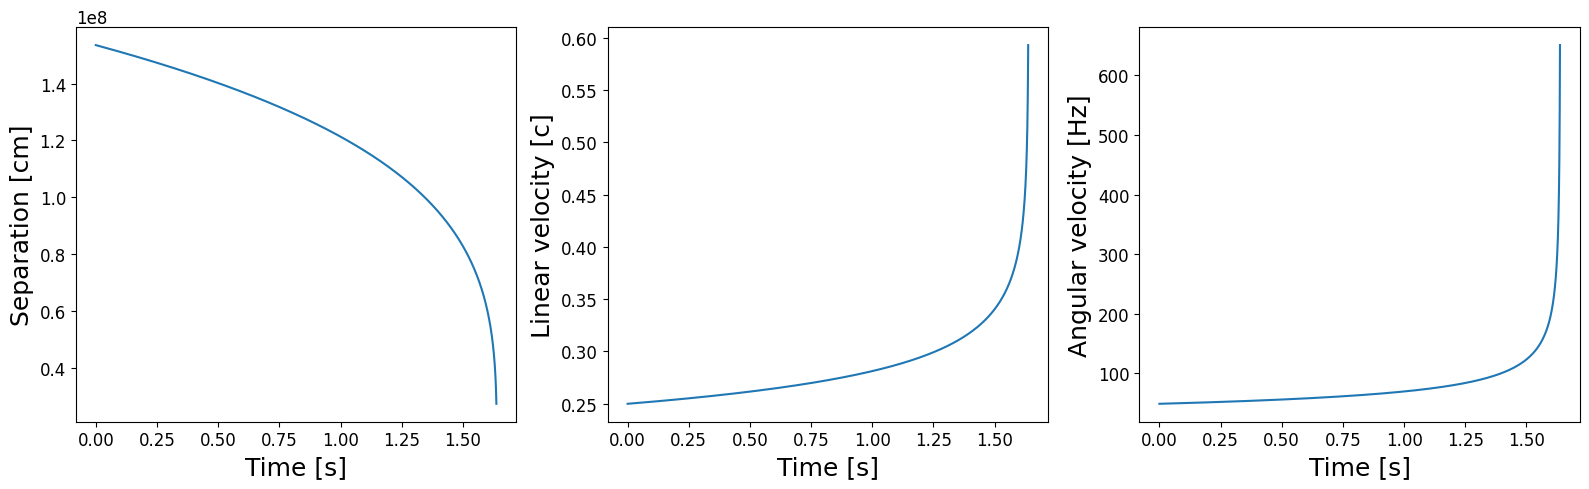

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

Mtot = 65 * Msun
initial_sep = 16 * G * Mtot / c**2 

# We prepare an array with times. 
# If we want to have smooth curves, we need a lot of points.
# (The number of points can be reduced using a quartic samplic
# as opposed to a linear one, but we will not deal with this.)

# We consider as time interval from 0 to 99.9% of the time to 
# merger
times = np.linspace(0, 0.999 * tau(Mtot, initial_sep), 1_000_000)

separations = separation(times, Mtot, initial_sep)
omegas = angular_velocity(Mtot, separations)

# What is the linear velocity?
circ_velocities = separations*omegas

ax1.plot(times, separations)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Separation [cm]")

ax2.plot(times, circ_velocities / c)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Linear velocity [c]")

ax3.plot(times, omegas)
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Angular velocity [Hz]")

# Add a little bit of space between the plots
plt.tight_layout()

As we see, the merger speeds up dramatically as time goes. The second plot also shows that the bodies are reaching up to 60 % of the speed of light!

### Problem 5

Continue considering a 65 $M_\odot$ binary. Assume that the binary starts on the $x$ axis at $t=0$, the position of one of the body is given by: 
$$x(t) = a(t) \cos[\varphi(t)] \qquad y(t) = a(t) \sin[\varphi(t)]$$
$\phi(t)$ is the phase accumulated during the evolution. If we consider that
$$ \Omega(t) = \frac{d \varphi} {d t},$$ we can invert this equation to
$$ \varphi(t) = \int_0^t \Omega(t') d t',$$ where we set initial phase to 0. The phase is essentially just the total angle swept by the binary since the initial time. In this, we do not wrap around the $2\pi$ (e.g two orbits corresponds to a phase will of $4\pi$). 

We can evaluate numerically the integral with the [rectangle method](https://en.wikipedia.org/wiki/Riemann_sum). Our time interval is uniformly discretized, so that we have $t_i = i * \Delta t$ (this is what we do with `np.linspace`) and we can evaluate the angular velocity $\Omega_i$ on $t_i$. The rectangle method approximates the integral with
$$ \varphi(t_i) = \int_0^{t_i} \Omega(t') d t' \approx \sum_{i=0}^{I} \Omega_i \Delta t,$$
where $I$ is the index approximately corresponding to time $t_i$. 

The NumPy function `np.cumsum` computes exactly the term $\sum_{i=0}^{I}$ for all the $I$ in our set, so all we need to do is multiply times to measure of integration $\Delta t$.

Plot the orbits for an initial separation of $12\,GM_{\rm tot}/c^2$.

In [9]:
#an example of what np.cumsum does
a = np.arange(1,5)
print(a)
print(np.cumsum(a))

[1 2 3 4]
[ 1  3  6 10]


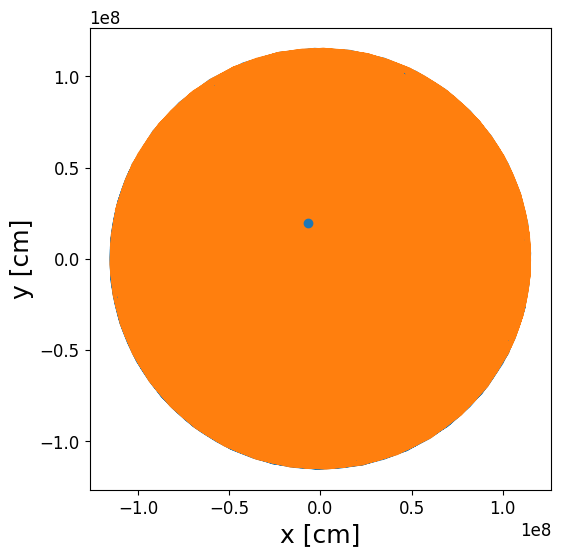

In [16]:
Mtot = 65 * Msun
initial_sep = 12 * G * Mtot / c**2 
times = np.linspace(0, 0.999 * tau(Mtot, initial_sep), 10000)

# FILL ME
dt = times[1] - times[0]
separations = separation(times, Mtot, initial_sep)
omegas = angular_velocity(Mtot, separations)
phases = np.cumsum(omegas)

xs = separations*np.cos(phases)
ys = separations*np.sin(phases)

# We save the outplot of plt.plot so that we can
# find out what is the color
p1 = plt.plot(xs, ys)
# The position of the second body
p2 = plt.plot(-xs,-ys)

plt.plot(xs[-1], ys[-1], marker="o", color=p1[0].get_color())
plt.plot(-xs[-1], -ys[-1], marker="o", color=p2[0].get_color())

plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.gca().set_aspect("equal")

## Gravitational-wave signals


Now that we have learned that binaries in the gravitational-wave driven regime are brought to the inevitable merger, we can turn our attention to the actual signal that they emit in this process.

For this, we need more input from the theory. Gravitational waves distort the spacetime, so they change how time flows and how distances are measured. The main quantity that describes this effect is known as *gravitational-wave strain* $h$, and, for our purposes, it is defined as $ h = \frac{\Delta L}{L}$, which means that when a gravitational wave reaches Earth, it induces a deformation on a body of length $L$ of $\Delta L = h L$. 

The change in distances induced by a gravitational wave is what detectors measure. At the moment, the only instrument that are able to detect gravitational waves are interferometers. When a gravitational wave passes through the interferometer the two arms change their distance, so the detector measures a change in intensity. See this [video](https://youtu.be/UA1qG7Fjc2A) to learn more about them. There are currently operational three main interferometers: LIGO (Laser Interferometer Gravitational-wave Observatory) Livingston, LIGO Hanford, and Virgo (not an acronym). Two additional ones are being built (KAGRA and IndIGO), and more are planned.

Now, we will try to model a simple gravitational-wave signal to understand its basic features. For that, we need to know what is the amplitude and the frequency of gravitational waves.

The amplitude of gravitational waves is (assuming face-on propagation):
$$ h_0(t) = \frac{1}{r} \frac{G^2 M^2}{c^4} \frac{1}{a(t)} $$
where $r$ is the distance from the source and $a(t)$ is the orbital separation. We are still assuming that our binary is equal mass.

Note that there is something fundamentally different compared to electromagnetic waves. In this second case, the intensity scales sa $r^{-2}$. So, it gets quadratically harder to detect sources far away. This is not the case for gravitational waves: the intensity scales as $r^{-1}$, so improvements in the instruments quickly extends the detectable range. In other words, if you double the sensitivity of a telescope, you expand the observable volume by a factor of $2^{3/2} \approx 2.8$, but if you double the sensitivity of a gravitational-wave interferometer, the observable volume increases by a factor of 8. In fact, the next-generation gravitational-wave detectors (that are going to be operational in the 2030s) is expected to be able to detect every single binary black hole event in the universe.

### Problem 6

Compute the gravitational-wave strain amplitude for a binary black hole system with total mass $65\,M_\odot$ at a separation of 500 km and a distance of 400 Mpc from Earth. Comment whether this is a large of small number considering that $h = \Delta L / L$. What are the units of $h$?

In [ ]:
Mtot = ....
separ = ....
distance = ....

def strain_amplitude(dist, Mtot, sep):
    """Gravitational-wave strain amplitude.
    
    dist: Distance of the source in cm.
    Mtot: Total mass of the binary in g.
    sep: Orbital separation in cm.
    """
    # FILL ME
    # return ....

h0 = strain_amplitude(distance, Mtot, separ)
print(f"The strain amplitude is {h0:.3E}")

In addition to the amplitude, gravitational waves have also a frequency. In the quadrupole approximation, the angular frequency of gravitational waves is twice the orbital frequency.
So, the frequency is $$f_{\rm GW}(t) = 2 \Omega(t) / 2\pi = \Omega(t) / \pi $$

The time evolution of $f_{\rm GW}(t)$ leads to the famous *chirp* signature. "Chirp" here means that frequency goes up with time (along with the amplitude). 


Now that we have amplitude and frequency evolution, we are almost ready to plot an actual gravitational-wave signal. What we are missing is the *phase* of the wave. Since the gravitational-wave frequency is twice the orbital frequency, the same is true for the phase
$$\varphi_{\rm GW}(t) = \int_0^t \Omega_{\rm GW}(t') d t' \quad {\rm but~also} \quad \varphi_{\rm GW}(t) = 2 \varphi(t) = \int_0^t 2 \Omega(t') d t'$$
(Where once again we assumed that the initial phase is 0 (at time 0) and the factor of 2 comes from the fact that the gravitational-wave phase is twice the orbital phase.)

Finally, we have that a gravitational-wave signal might look like:
$$ h(t) = h_0(t) \cos \varphi_{\rm GW}(t) $$
(This is technically only the *plus polarization*. We are not going to discuss this here.)

### Problem 7

Consider an equal-mass binary black hole system with total mass 65 $M_\odot$ at a initial separation of $16\, G M_{\rm tot}/ c^2$, 400 Mpc from Earth. Plot the gravitational-wave frequency as a function of time. Looking at the frequency range. Would a gravitational-wave be audible by humans? (Hint: you can find the 'audible range for humans' online if you don't know it off the top of your head)

Plot also the complete gravitational-wave signal. 

You can compute the phase $\varphi_{\rm GW}(t)$ using `np.cumsum`, which returns the cumulative sum of an array, and multiply times `dt`.

In [ ]:
Mtot = .....
initial_sep = .....
times = np.linspace(0, 0.999 * tau(Mtot, initial_sep), 1_000_000)

dt = times[1] - times[0]

separations = separation(times, Mtot, initial_sep)
omegas = angular_velocity(Mtot, separations)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

GW_angular_velocity = ..... #i.e. Omega_GW
GW_freqs = ......           #i.e. f_GW
GW_phase = ......           #i.e. phi_GW
GW_strain = ......          #i.e. h(t) including amplitude and phase

ax1.plot(times, GW_freqs)
ax1.set_ylabel("GW Frequency [Hz]")
ax1.set_xlabel("Time [s]")

ax2.plot(times, GW_strain)
ax2.set_ylabel("GW Strain")
ax2.set_xlabel("Time [s]")

### Problem 8

Compare the gravitational-wave signal that you obtained with the one provided in the file `GW.dat` by plotting both on them on the same plot. The signal in the is a realistic representation of a gravitational-wave event. Comment on the difference between the two signals and make a guess on why they are different.

In [ ]:
# NumPy reads "by row", but our file is saved 
# "by columns", so we take the transpose
real_times, real_strain = np.loadtxt("GW.dat").T

plt.plot(real_times, real_strain, label="Realistic signal")
plt.plot(times, GW_strain, label="Our model")
plt.xlabel("Time [s]")
plt.ylabel("GW Strain")
plt.legend()

## Closing remarks 

The first detection of gravitational waves happened in 2014, only 8 years ago. The field of gravitational-wave astronomy is in its infancy and the scientific community is moving its first steps. Researchers are currently planning and building the next generation of instruments (LISA, Cosmic Explorer, Einstein Telescope), which will detect thousands of events (as opposed to the tens we currently have), dramatically changing the field. Lots of exciting science awaits.

![LISA](https://img.designdevelopmenttoday.com/files/base/indm/multi/image/2022/05/LISA.628660c80ff93.png?auto=format%2Ccompress&dpr=2&q=70&rect=0%2C29%2C1440%2C810&w=700)

### Bonus problem

Consider the haiku that opens this notebook. Explain in words:
- Why do we talk about _chrips_ for gravitational waves?
- Why is it appropriate to describe gravitational waves from stellar-mass black holes as _melodies_?
- Why are binary black holes the most relevant sources of gravitational waves?
- Why do we say that gravitational waves are weak/faint?